# Proyecto detección de suciedad en paneles solares

 
<br>
<br>
<br>
<br>
<img src="https://deep-solar-eye.github.io/img/powerDiag.png" width=500>

# Exploración Dataset

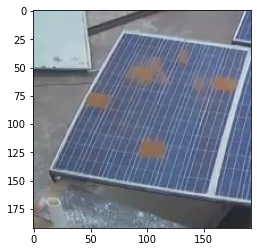

In [4]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import numpy as np

cwd = Path.cwd()

DATA_PATH_1 = cwd / 'datasets' / 'Suciedad_tipo1'
DATA_PATH_2 = cwd / 'datasets' / 'Suciedad_tipo2'
DATA_PATH_1000 = cwd / 'datasets' / 'dataset_1000'

images_1 = list(DATA_PATH_1.glob('*.jpg'))
images_2 = list(DATA_PATH_2.glob('*.jpg'))
all_images_path = list(DATA_PATH_1000.glob('*.jpg'))


img = plt.imread(images_1[4])



plt.imshow(img)


# 


In [3]:
all_images

[WindowsPath('D:/UNAL/Semestre_8/Visión Artificial/proyecto/Soiling-Detection-in-Solar-Panels/datasets/dataset_1000/Img_000_L_0.643516114251.jpg'),
 WindowsPath('D:/UNAL/Semestre_8/Visión Artificial/proyecto/Soiling-Detection-in-Solar-Panels/datasets/dataset_1000/Img_001_L_0.110417563495.jpg'),
 WindowsPath('D:/UNAL/Semestre_8/Visión Artificial/proyecto/Soiling-Detection-in-Solar-Panels/datasets/dataset_1000/Img_002_L_0.732731732429.jpg'),
 WindowsPath('D:/UNAL/Semestre_8/Visión Artificial/proyecto/Soiling-Detection-in-Solar-Panels/datasets/dataset_1000/Img_003_L_0.354611333307.jpg'),
 WindowsPath('D:/UNAL/Semestre_8/Visión Artificial/proyecto/Soiling-Detection-in-Solar-Panels/datasets/dataset_1000/Img_004_L_0.263340072291.jpg'),
 WindowsPath('D:/UNAL/Semestre_8/Visión Artificial/proyecto/Soiling-Detection-in-Solar-Panels/datasets/dataset_1000/Img_005_L_0.0359842757787.jpg'),
 WindowsPath('D:/UNAL/Semestre_8/Visión Artificial/proyecto/Soiling-Detection-in-Solar-Panels/datasets/dataset_

In [5]:
all_images=[plt.imread(str(image_name)).reshape(-1,1) for image_name in all_images_path]
all_images=np.array(all_images)[:,:,0]#.shape

In [6]:
labels=[str(image_name).split('_')[-1][:-4] for image_name in all_images_path]
labels=np.array(labels,dtype=np.float32)#.reshape(-1,1)
labels.shape

(1000,)

In [7]:
import pandas as pd


labels2=pd.cut(labels, 3,labels=["Low", "Medium", "High"])

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(all_images, labels2)

In [11]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train,  y_train)

SVC()

In [12]:
index=99
img1=plt.imread(str(all_images_path[index])).reshape(-1,1) 
img1=img1.reshape(1,-1)
print(clf.predict(img1))
print(labels2[index])

['Low']
Low


In [13]:
y_pred = clf.predict(x_test)

y_pred

array(['Low', 'Low', 'Low', 'Low', 'Medium', 'Medium', 'Low', 'Low',
       'Low', 'Low', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low',
       'Low', 'Low', 'Low', 'High', 'Low', 'Medium', 'High', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Low', 'Medium',
       'High', 'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Medium',
       'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'High', 'Low', 'Medium', 'Low',
       'Low', 'Low', 'Medium', 'Medium', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium',
       'Low', 'Medium', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Low',
       'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Medium', 'Low',
       'Medium', 'Low', 'Low', 'Low', 'Low', 'Low', 'Medium', 'High',
       'Medi

In [14]:
from sklearn.metrics import confusion_matrix, precision_score
print(precision_score(y_test, y_pred, average='weighted'))

0.8641517241379311


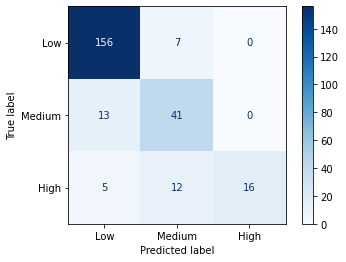

In [15]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


plot_confusion_matrix(clf, x_test, y_test,
                      cmap=plt.cm.Blues,
                      labels=['Low','Medium','High'],
                      display_labels=['Low','Medium','High'])